<h4>Analysis and Querying 2</h4>

<h5>Description:<br>sentence</h5>

<h5>Notes: This ipynb file still uses db_utils, which is deprecated in later versions</h5>

[1: Imports](#1:-Imports)

[2: Class Instantiation](#2:-Class-Instantiation)

[2.5: dataframe from data2.csv](#2.5:-dataframe-from-data2.csv)

[3: Defining Methods For Removing Outliers](#3:-Defining-Methods-For-Removing-Outliers)

[4: Implementing Methods](#4:-Implementing-Methods)

#### 1: Imports

<h5>This includes importing db_utils, which is deprecated in later versions</h5>

In [1]:
import pandas as pd
from db_utils import Plotter, DataTransform
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from db_utils import Plotter, DataFrameTransform
from IPython.display import display

#### 2: Class Instantiation

<h5>text</h5>

In [2]:
PL = Plotter()
DFT = DataFrameTransform()
DT = DataTransform()

#### 2.5: dataframe from data2.csv

<h5>Also here we read in a dataframe from a csv file.<br> Then we create a list of columns which must be converted to the data type 'float'.<br> Then we convert them.<br> Then we define a list of columns.</h5>

In [3]:
df = pd.read_csv('data2.csv')
list_of_to_float = ['delinq_2yrs', 'inq_last_6mths']
df = DT.to_float(df, list_of_to_float)
columns = ['open_accounts','total_accounts','out_prncp','out_prncp_inv',
           'annual_inc', 'loan_amount', 'funded_amount', 'funded_amount_inv',
           'dti', 'instalment', 'int_rate','delinq_2yrs', 'inq_last_6mths']

#### 3: Defining Methods For Removing Outliers

<h5>Here we define three different methods of handling outliers, trimming and capping.<br> In the end only one z-score method was used, but it is useful to have more than one method at hand.</h5>

<h5>Trimming: Handling Outliers Pt 1.<br>Capping: Handling Outliers Pt 2.</h5>

In [4]:
def remove_and_cap_with_zscore_from_video(display = False): #TEST COMPLETE, SUCCESS
        if display == True: PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_z_score_vid_trim = DFT.z_score_trim_vidver(df, columns) # new_df, has been trimmed, test successful!
        if display == True: PL.plot_boxplots(df_z_score_vid_trim, columns) # makes boxplots, test unsuccessful!
        
        if display == True: PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_z_score_vid_capping = DFT.z_score_cap_vidver(df, columns) # new_df2, has been trimmed, test successful!
        if display == True: PL.plot_boxplots(df_z_score_vid_capping, columns) # makes boxplots, test successful!
        return df_z_score_vid_trim, df_z_score_vid_capping

def remove_and_cap_with_zscore_from_notebook():#TEST COMPLETE, SUCCESS
        DFT.create_z_score_df(df, columns)
        
        PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_trimmed_by_z_score = DFT.trim_by_z_score(df, columns)
        PL.plot_boxplots(df_trimmed_by_z_score, columns)
        
        PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_capped_by_z_score = DFT.cap_by_z_score(df, columns)
        PL.plot_boxplots(df_capped_by_z_score, columns) # makes boxplots, test successful!
        
def remove_and_cap_with_iqr_from_notebook():#TEST COMPLETE, SUCCESS
        PL.plot_boxplots(df, columns)
        df_trimmed_by_iqr = DFT.trim_by_iqr_limits(df, columns)
        PL.plot_boxplots(df_trimmed_by_iqr, columns)
        
        PL.plot_boxplots(df, columns)
        df_capped_by_limits = DFT.cap_by_limits(df, columns)
        PL.plot_boxplots(df_capped_by_limits, columns)
#remove_and_cap_with_zscore_from_video()
#remove_and_cap_with_zscore_from_notebook()
#remove_and_cap_with_iqr_from_notebook()

#### 4: Implementing Methods

<h5>Then we implement the method shown above.<br>From the function we are returned two dataframes, which we assign to two variables.</h5>

In [5]:

df_z_score_vid_trim, df_z_score_vid_capping = remove_and_cap_with_zscore_from_video(display = False)
#print(df_z_score_vid_trim.columns)

899 outliers removed using zscore with vid trimming method
0 outliers removed using zscore with vid capping method


#### 5: Compute the correlation matrix

In [6]:
# Compute the correlation matrix
corr = df_z_score_vid_trim[(columns)].corr()

#### 6: Generate a mask for the upper triangle

In [7]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#### 7: Set up the matplotlib figure

In [8]:
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

#### 8: Generate a custom diverging colormap

In [9]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#### 9: Draw the heatmap with the mask and correct aspect ratio

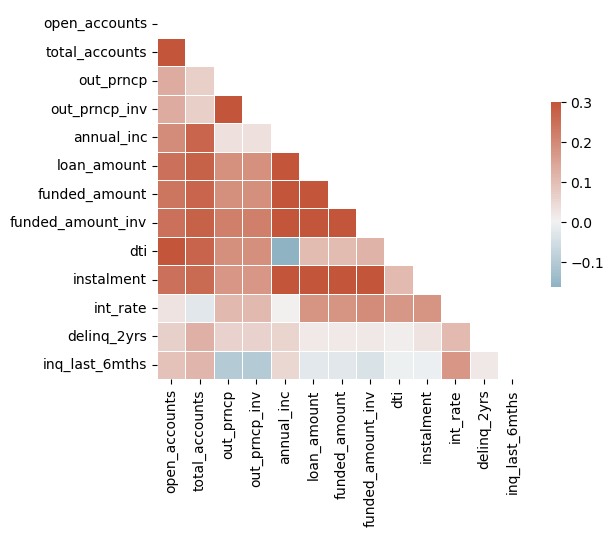

In [10]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### 10: ?

In [11]:
corr = df[(columns)].corr()

#### 11: ?

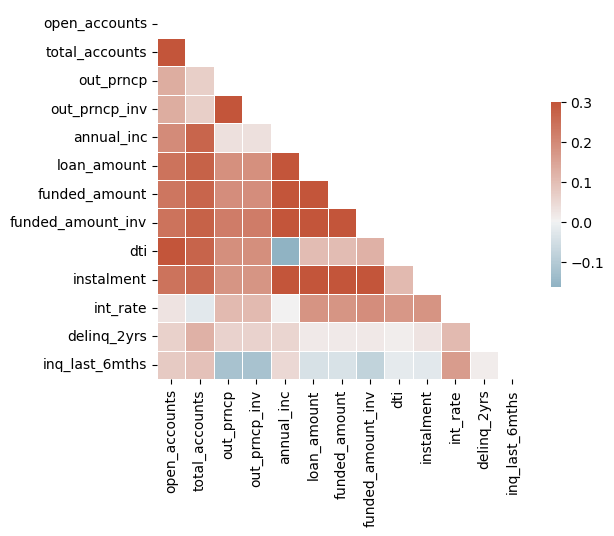

In [12]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()